# Урок 8. Снижение размерности данных 

Для закрепления теории реализуем **PCA** с помощью Python.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [3]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по признаку
means = X_.mean(axis=0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for j in range(cols):
    for i in range(rows):
        X_[i, j] /= std[j]

In [ ]:
(4, 150) * (150, 4) = (4, 4)

In [5]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
437.77467247979905
137.1045707202107
22.01353133569719
3.107225464292897


Оценим долю дисперсии, которая описывается найденными компонентами.

In [6]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.85076178670179, 3.668921889282866, 0.517870910715483]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [7]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
(150, 4) * (4, 2) = (150, 2)

In [8]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)
Z.shape

(150, 2)

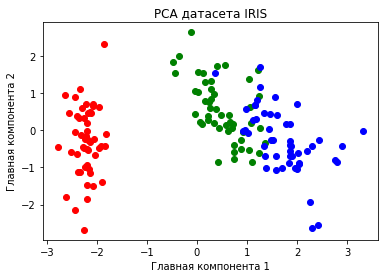

In [9]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

PCA наиболее хорошо работает, когда собственные значения $\lambda$ на каком-то участке графика распределения убывают скачкообразно (критерий крутого склона), другими словами, если существуют предпосылки к тому, что следует решать задачу в пространстве меньшей размерности. Если же они убывают монотонно, следует рассмотреть вариант использования других методов работы с пространством признаков.

## Домашнее задание

#### 1. Можно ли отобрать наиболее значимые признаки с помощью PCA?<br>
__Ответ:__ Да можно

__Комментарии преподавателя:__<br>
Ирина Телина・Преподаватель<br>
Михаил, дорый день еще раз!<br>
1) метод PCA не отбирает наиболее важные признаки, а создает новые признаки, которые являются линейной комбинацией старых. например, у нас три исходных признака - ```x1, x2 и x3```. PCA сформирует новый признак ```z = w1 * x1 + w2 * x2 + w3 * x3```. это и будет 1-ая главная компонента. если у нас 100 признаков, то все они будут входить в формулы для главных компонент, но с разными весами w (причем вес ничего не говорит о предсказательной силе признака, а только о его изменчивости). таким образом, PCA не отбирает лучшие признаки, а лишь уменьшает размерность.<br>
2) PCA с помощью сингулярного разложения написан правильно, только не очень понятно, почему выведенная на экран матрица весов размера 4х3 при умножении на матрицу признаков дает матрицу размером 150х2. вы все же отобрали две главные компоненты? или выполняли ячейки блокнота в другом порядке? да<br>
3) вы опять данные стандартизовали, но не использовали. здесь все верно.

#### $^*$2. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [10]:
X, y = datasets.load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
U, D, V = np.linalg.svd(X_scaled)

In [11]:
U.shape, D.shape, V.shape

((150, 150), (4,), (4, 4))

In [12]:
eig_sum = sum(D)
var_exp = [(i / eig_sum) * 100 for i in D]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[53.52971788236241, 29.95681278402008, 12.00368241720948, 4.509786916408033]
Кумулятивная доля дисперсии по компонентам 
[ 53.52971788  83.48653067  95.49021308 100.        ]


In [13]:
# матрица весов
W = V.T[:, :3]
print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762  0.71956635]
 [-0.26934744 -0.92329566 -0.24438178]
 [ 0.5804131  -0.02449161 -0.14212637]
 [ 0.56485654 -0.06694199 -0.63427274]]


In [14]:
# новая матрица "объекты-признаки"
X_pca = X @ W
print(f'Размерность матрицы "объекты-признаки": {X_pca.shape}\n')

Размерность матрицы "объекты-признаки": (150, 3)



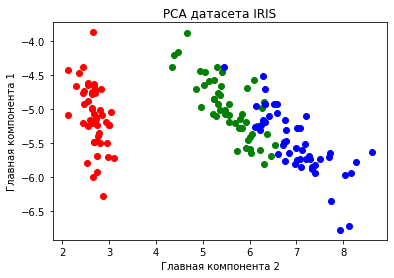

In [15]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], c=c)
plt.xlabel('Главная компонента 2')
plt.ylabel('Главная компонента 1')
plt.title('PCA датасета IRIS')
plt.show()

#### $^*$3. Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [16]:
# загрука и подготовка данных
X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 5
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# обучение модели до применения PCA
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}; Test accuracy: {accuracy_score(y_test, y_pred_test)}')

Train accuracy: 0.9809523809523809; Test accuracy: 0.9777777777777777


In [18]:
# применим PCA
U, D, V = np.linalg.svd(X)
U.shape, D.shape, V.shape

((150, 150), (4,), (4, 4))

In [19]:
eig_sum = sum(D)
var_exp = [(i / eig_sum) * 100 for i in D]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[80.59340691495326, 14.916876798004958, 2.9067159767294912, 1.5830003103122967]
Кумулятивная доля дисперсии по компонентам 
[ 80.59340691  95.51028371  98.41699969 100.        ]


In [20]:
# возьмем 2 признака
# матрица весов
W = V.T[:, :2]
print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.75110816  0.2841749 ]
 [-0.38008617  0.5467445 ]
 [-0.51300886 -0.70866455]
 [-0.16790754 -0.34367081]]


In [21]:
# новая матрица "объекты-признаки"
X_pca = X @ W
print(f'Размерность матрицы "объекты-признаки": {X_pca.shape}\n')

Размерность матрицы "объекты-признаки": (150, 2)



In [22]:
# обучение модели после применения PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 5)

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}; Test accuracy: {accuracy_score(y_test, y_pred_test)}')

Train accuracy: 0.9619047619047619; Test accuracy: 0.9777777777777777


__Вывод:__<br>
После применения PCA точность на обучающей выборке немного снизилась, однако метод PCA позволяет ускорить работу алгоритма на больших выборках путем удаления незначимых признаков.

#### $^{**}$4. Принять участие в одном или двух соревнованиях и прислать свой псевдоним на Kaggle и ссылку на github с решением задачи:
    - по регрессии https://www.kaggle.com/c/tutors-expected-math-exam-results
    - или классификации https://www.kaggle.com/c/choose-tutors 
    
    В скрипте можно использовать только эти импорты:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # только для бустинга
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Дополнительные материалы

1. [Методы отбора признаков](https://habr.com/ru/company/aligntechnology/blog/303750/)
2. [Взаимная информация](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)
3. [Методы понижения размерности](http://www.machinelearning.ru/wiki/images/0/06/SLT%2C_lecture_8.pdf)
4. [Лемма о малом искажении](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0_%D0%BE_%D0%BC%D0%B0%D0%BB%D0%BE%D0%BC_%D0%B8%D1%81%D0%BA%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8)
5. [PCA from Scratch in Python](https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset)

Хороший разбор работы PCA. На пальцах и с подробными примерами: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60